# Classification of MNIST dataset digits
## Labels = 10
## Training Samples =  60,000
## Testing Samples =   10,000

In [95]:
# Modules
from PIL import Image
import dhash
import numpy as np
import scipy
from keras.datasets import mnist
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import metrics

%matplotlib inline
np.random.seed(123)  # for reproducibility


## 2. Load MNIST data from keras

In [96]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


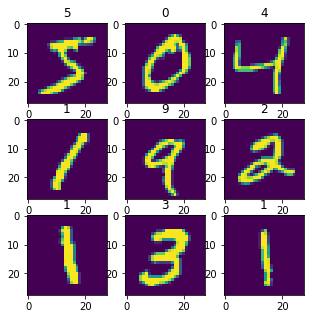

In [97]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,1+i)
    plt.imshow(X_train[i])
    plt.title(  str(Y_train[i])  )

## 3. Image Hashing on rows and columns  for training set

In [98]:
# size of image and output format
size = 9
format_ = '0' + str(size**2) + 'b'
X = X_train

#preallocate
X_train_hashed = np.zeros((X.shape[0], size**2 * 2));

for idx , Img in enumerate(X):
    row, col = dhash.dhash_row_col( Image.fromarray(Img) , size = size)
    hash_ = format(row, format_) + format(col, format_)
    # hash_ is string
    for colidx,num in enumerate(hash_):
        X_train_hashed[idx,colidx] = int(num)

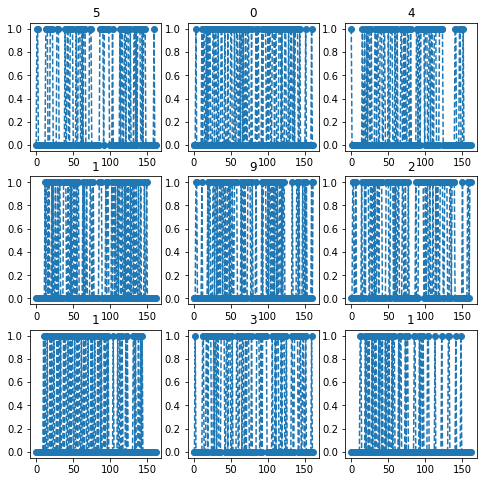

In [99]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,1+i)
    plt.plot(X_train_hashed[i],'o--')
    plt.title(  str(Y_train[i])  )


## 4. Image Hashing on rows and columns  for training set

In [100]:
X = X_test

X_test_hashed = np.zeros((X.shape[0], size**2 * 2));

for idx , Img in enumerate(X):
    row, col = dhash.dhash_row_col( Image.fromarray(Img) , size = size)
    hash_ = format(row, format_) + format(col, format_)
    
    # hash_ is string
    for col,num in enumerate(hash_):
        X_test_hashed[idx,col] = int(num)

## 6. Random Forest Classifier 

In [101]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC = RFC.fit(X_train_hashed, Y_train)
y_pred = RFC.predict(X_test_hashed)

In [102]:
Yreal = Y_test
Ypred = y_pred
print("Classification Report:\n%s" % metrics.classification_report(Y_test, Ypred))
print("Cohen kappa Score:\n%s" % metrics.cohen_kappa_score(Y_test, Ypred))
print("Hamming Loss Score:\n%s" % metrics.hamming_loss(Y_test, Ypred))

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.99      0.99      0.99      1135
          2       0.95      0.94      0.94      1032
          3       0.93      0.93      0.93      1010
          4       0.96      0.95      0.95       982
          5       0.94      0.94      0.94       892
          6       0.95      0.97      0.96       958
          7       0.95      0.95      0.95      1028
          8       0.94      0.93      0.93       974
          9       0.95      0.93      0.94      1009

avg / total       0.95      0.95      0.95     10000

Cohen kappa Score:
0.945534991384
Hamming Loss Score:
0.049


In [64]:
param_grid = {'n_estimators':sp_randint(2, X_train_hashed.shape[1])}
RFC = RandomForestClassifier()
clf = RandomizedSearchCV(RFC, param_grid, n_jobs=-1, verbose=1, cv = 4)
clf.fit(X_train_hashed, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.2min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x111cad128>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [65]:
Yreal = Y_test
Ypred = clf.best_estimator_.predict(X_test_hashed)
print("Classification Report:\n%s" % metrics.classification_report(Y_test, Ypred))
print("Cohen kappa Score:\n%s" % metrics.cohen_kappa_score(Y_test, Ypred))
print("Hamming Loss Score:\n%s" % metrics.hamming_loss(Y_test, Ypred))

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.95      0.95      0.95      1032
          3       0.94      0.94      0.94      1010
          4       0.96      0.95      0.95       982
          5       0.94      0.94      0.94       892
          6       0.95      0.97      0.96       958
          7       0.96      0.96      0.96      1028
          8       0.93      0.92      0.92       974
          9       0.94      0.93      0.93      1009

avg / total       0.95      0.95      0.95     10000

Cohen kappa Score:
0.946979923654
Hamming Loss Score:
0.0477


In [66]:
clf.best_params_

{'n_estimators': 127}